In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.patches as patches
import math
import numpy as np

In [2]:
class World:
    def __init__ (self, time_span, time_interval, debug=False):
        self.objects=[]
        self.debug=debug
        self.time_span=time_span
        self.time_interval=time_interval
    
    def append(self,obj):
        self.objects.append(obj)
    
    def one_step(self,time,ax,elems):
        while elems: elems.pop().remove()
        elems.append(ax.text(-4.5,4.5,"time:"+str(time)))
        for obj in self.objects: 
            obj.draw(ax,elems)
            if hasattr(obj,"one_step"):obj.one_step(self.time_interval)
    
    def draw(self):
        fig=plt.figure(figsize=(4,4))
        ax =fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize=10)
        ax.set_ylabel("Y",fontsize=10)
        
        elems=[]
    
        if self.debug:
            for frame in range(3): self.one_step(frame*self.time_interval,ax,elems)
        else:
            self.ani = anm.FuncAnimation(fig=fig,func=self.one_step,frames=int(self.time_span/self.time_interval)+1,fargs=(ax,elems),interval=self.time_interval,repeat=False)
            plt.show()                

In [63]:
class IdealRobot:
    def __init__(self,pose,color="black",agent=None,sensor=None):
        self.pose=pose
        self.r=0.2
        self.color=color
        self.agent=agent
        self.sensor=sensor
        self.poses=[pose]
    
    def draw(self,ax,elems):
        x,y,theta=self.pose
        self.poses.append(self.pose)
        xn=x+self.r*math.cos(theta)
        yn=y+self.r*math.sin(theta)
        elems+=ax.plot([x,xn],[y,yn],color=self.color)
        c=patches.Circle(xy=(x,y),radius=self.r,fill=False,color=self.color)
        elems.append(ax.add_patch(c))
        elems+=ax.plot([e[0] for e in self.poses],[e[1] for e in self.poses],color=self.color)
        if self.sensor and len(self.poses)>1:
            self.sensor.draw(ax,elems,self.poses[-2])

    @classmethod
    def state_transition(cls,nu,omega,time,pose):
        t0=pose[2]
        if math.fabs(omega)<1e-10:
            return pose+np.array([nu*math.cos(omega),
                                   nu*math.sin(omega),
                                   omega])*time
        else:
            return pose+np.array([nu/omega*(math.sin(t0+omega*time)-math.sin(t0)),
                                   nu/omega*(-math.cos(t0+omega*time)+math.cos(t0)),
                                   omega*time])
        
    def one_step(self,time):
        if not self.agent:return
        if self.sensor: obs=self.sensor.data(self.poses[-2])
        else: obs=None
        nu,omega=self.agent.decision(obs)
        self.pose=self.state_transition(nu,omega,time,self.pose)

In [64]:
class Agent:
    def __init__(self,nu,omega):
        self.nu=nu
        self.omega=omega
        
    def decision(self,observation=None):
        return self.nu,self.omega

In [65]:
class Landmark:
    def __init__(self,x,y):
        self.pos=np.array([x,y]).T
        self.id=None
        
    def draw(self,ax,elems):
        elems.append(ax.scatter(self.pos[0],self.pos[1],s=100,marker="*",label="landmarks",color="orange"))
        elems.append(ax.text(self.pos[0],self.pos[1],"id:"+str(self.id),fontsize=10))

In [66]:
class Map:
    def __init__(self):
        self.landmarks=[]
    def append_landmark(self,landmark):
        landmark.id=len(self.landmarks)
        self.landmarks.append(landmark)
    def draw(self,ax,elems):
        for lm in self.landmarks: lm.draw(ax,elems)

<IPython.core.display.Javascript object>


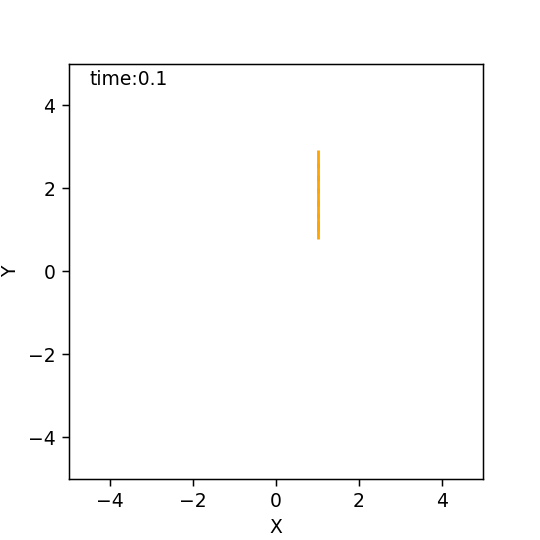

<IPython.core.display.Javascript object>


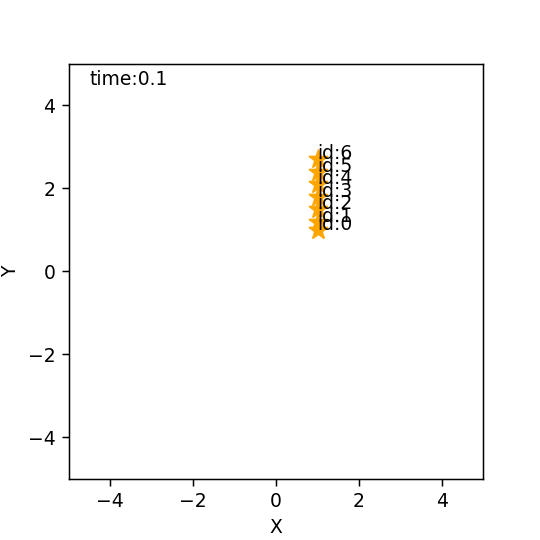

<IPython.core.display.Javascript object>


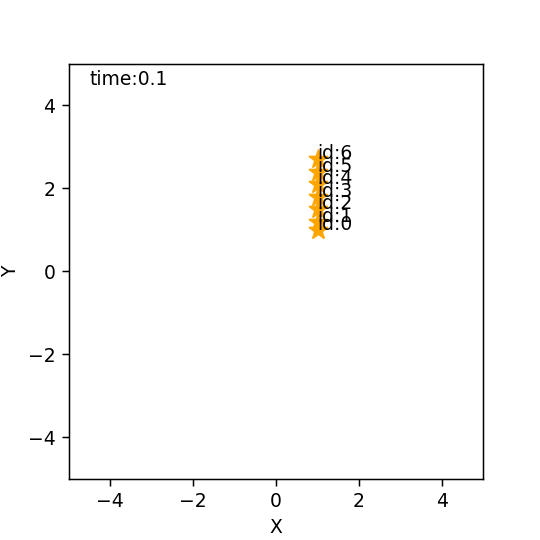

<IPython.core.display.Javascript object>


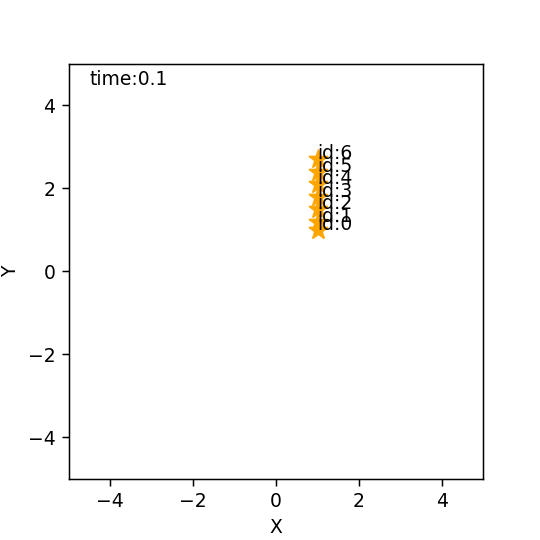

<IPython.core.display.Javascript object>


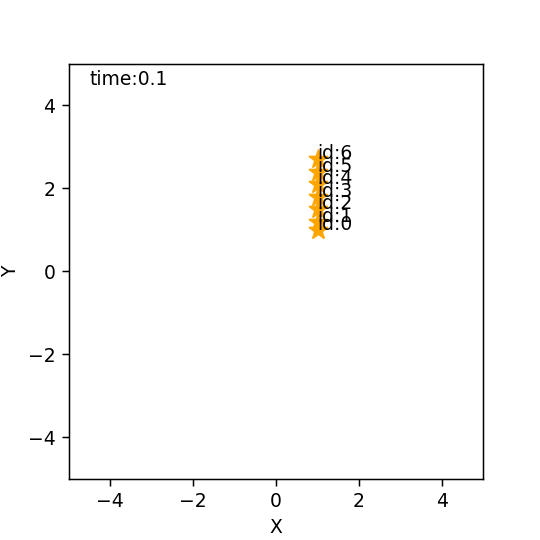

<IPython.core.display.Javascript object>


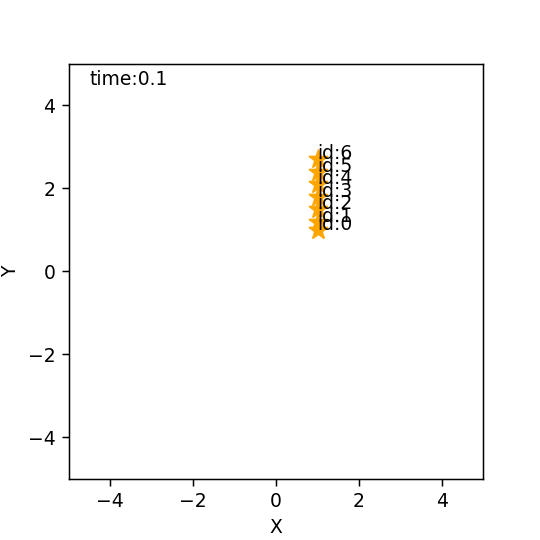

<IPython.core.display.Javascript object>


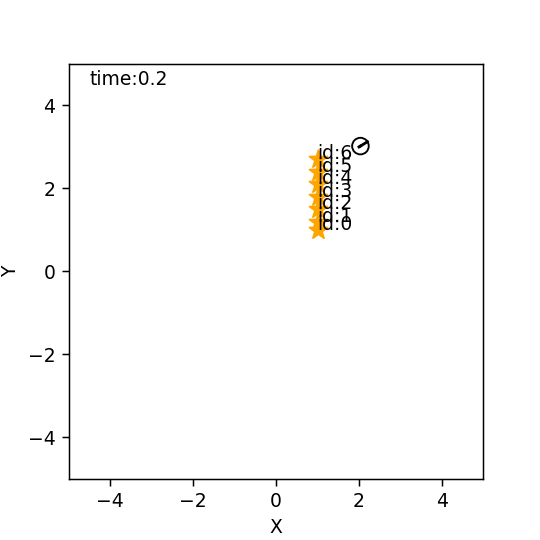

<IPython.core.display.Javascript object>


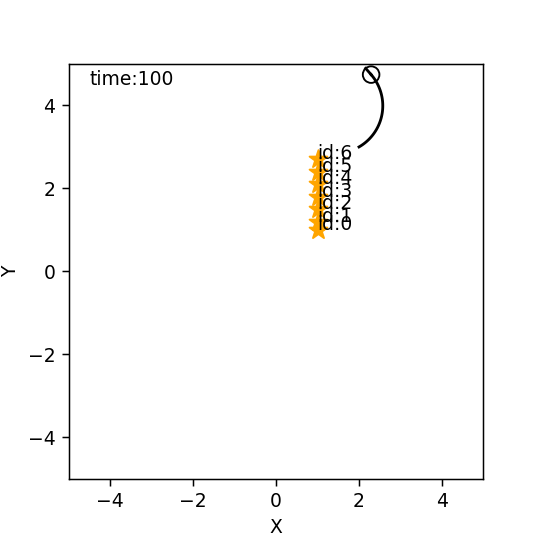

In [68]:
world=World(10,0.1,debug=False)

m=Map()
m.append_landmark(Landmark(1,1))
m.append_landmark(Landmark(1,1.2))
m.append_landmark(Landmark(1,1.5))
m.append_landmark(Landmark(1,1.8))
m.append_landmark(Landmark(1,2.1))
m.append_landmark(Landmark(1,2.4))
m.append_landmark(Landmark(1,2.7))
world.append(m)

straight=Agent(0.2,10/180*math.pi)
robot1=IdealRobot(np.array([2,3,math.pi/6]),agent=straight)
world.append(robot1)
world.draw()